In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
np.random.seed(777)
import math
import keras
import keras.backend as K
import h5py
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, add, GlobalAveragePooling2D
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
from keras.regularizers import l2
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import DenseNet201
from keras.applications import DenseNet121

from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Lambda,Concatenate
from keras.layers import SeparableConv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D, Add

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

Using TensorFlow backend.


In [3]:
train_dir = 'data/iciar/train/'
test_dir = "data/iciar/test/"

extracted_features_dir = "extracted_features/"
model_name = "iciar_vgg19"

In [4]:
import keras
import tensorflow as tf
import keras.backend as K

print("Keras Version", keras.__version__)
print("tensorflow Version", tf.__version__)
print("dim_ordering:", K.image_dim_ordering())

Keras Version 2.2.4
tensorflow Version 1.9.0
dim_ordering: tf


In [5]:
batch_size = 32
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)
epochs = 1000

In [6]:
for root,dirs,files in os.walk(train_dir):
    print (root, len(files))

print("*"*30)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

data/iciar/train/ 0
data/iciar/train/carcinoma 2310
data/iciar/train/non-carcinoma 2310
******************************
data/iciar/test/ 0
data/iciar/test/carcinoma 50
data/iciar/test/non-carcinoma 50


In [7]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.25,
    zoom_range=0.2,
    shear_range=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'training',
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    subset = 'validation',
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 3466 images belonging to 2 classes.
Found 1154 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))

# nb_test_without_aug_samples = len(test_generator_without_aug.filenames)
# predict_size_test_without_aug = int(math.ceil(nb_test_without_aug_samples / batch_size))

num_classes = len(train_generator.class_indices)

print("nb_train_samples:", nb_train_samples)
print("nb_validation_samples:", nb_validation_samples)
print("\npredict_size_train:", predict_size_train)
print("predict_size_validation:", predict_size_validation)
# print("nb_test_without_aug_samples:", nb_test_without_aug_samples)
# print("predict_size_test_without_aug_samples:", predict_size_test_without_aug)
print("nb_test_samples:", nb_test_samples)
print("predict_size_test:", predict_size_test)

print("\n num_classes:", num_classes)

nb_train_samples: 3466
nb_validation_samples: 1154

predict_size_train: 109
predict_size_validation: 37
nb_test_samples: 100
predict_size_test: 4

 num_classes: 2


In [9]:
from keras.backend.tensorflow_backend import get_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import set_session

def reset_keras_tf_session():
    """
    this function clears the gpu memory and set the 
    tf session to not use the whole gpu
    """
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

#     config = tf.ConfigProto()
#     config.gpu_options.allow_growth = True
#     set_session(tf.Session(config=config))


reset_keras_tf_session()

In [10]:
from keras.applications.mobilenetv2 import MobileNetV2
from keras.applications.densenet import DenseNet169
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile

input_tensor = Input(shape = input_shape)  
model = VGG19(weights='imagenet', include_top=False, pooling = 'avg', input_tensor=input_tensor)

In [11]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 global_average_pooling2d_1


In [12]:
c1 = model.layers[4].output 
c1 = GlobalAveragePooling2D()(c1)       

c2 = model.layers[7].output
c2 = GlobalAveragePooling2D()(c2)       

c3 = model.layers[12].output
c3 = GlobalAveragePooling2D()(c3)       

c4 = model.layers[17].output
c4 = GlobalAveragePooling2D()(c4)

con = concatenate([c1, c2, c4])

bottleneck_final_model = Model(inputs=model.input, outputs=con)

In [13]:
bottleneck_final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [14]:
bottleneck_features_train = bottleneck_final_model.predict_generator(train_generator, predict_size_train)
np.save(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [15]:
bottleneck_features_validation = bottleneck_final_model.predict_generator(validation_generator, predict_size_validation)
np.save(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

bottleneck_features_test = bottleneck_final_model.predict_generator(test_generator, predict_size_test)
np.save(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [16]:
train_data = np.load(extracted_features_dir+'bottleneck_features_train_'+model_name+'.npy')
validation_data = np.load(extracted_features_dir+'bottleneck_features_validation_'+model_name+'.npy')
test_data = np.load(extracted_features_dir+'bottleneck_features_test_'+model_name+'.npy')

train_labels = train_generator.classes
train_labels = to_categorical(train_labels, num_classes=num_classes)

validation_labels = validation_generator.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [17]:
dropout_rate = 0.4

model = Sequential()
# model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation=tf.nn.softmax))

adam_opt2=Adam(lr = 0.0001, beta_1=0.6, beta_2=0.9, amsgrad=False)

model.compile(optimizer=adam_opt2, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 2)

with open(extracted_features_dir+'history_'+model_name+'.txt','w') as f:
    f.write(str(history.history))

# model.save_weights(top_model_weights_path)
# model.save(top_model_path)

Train on 3466 samples, validate on 1154 samples
Epoch 1/1000
 - 1s - loss: 0.8125 - acc: 0.6246 - val_loss: 0.5048 - val_acc: 0.7600
Epoch 2/1000
 - 0s - loss: 0.5496 - acc: 0.7285 - val_loss: 0.4753 - val_acc: 0.7894
Epoch 3/1000
 - 0s - loss: 0.4994 - acc: 0.7669 - val_loss: 0.4708 - val_acc: 0.7730
Epoch 4/1000
 - 0s - loss: 0.4727 - acc: 0.7796 - val_loss: 0.4829 - val_acc: 0.7487
Epoch 5/1000
 - 0s - loss: 0.4550 - acc: 0.7914 - val_loss: 0.4428 - val_acc: 0.7894
Epoch 6/1000
 - 0s - loss: 0.4494 - acc: 0.7972 - val_loss: 0.4402 - val_acc: 0.7938
Epoch 7/1000
 - 0s - loss: 0.4219 - acc: 0.8104 - val_loss: 0.3993 - val_acc: 0.8319
Epoch 8/1000
 - 0s - loss: 0.4088 - acc: 0.8214 - val_loss: 0.3721 - val_acc: 0.8553
Epoch 9/1000
 - 0s - loss: 0.3898 - acc: 0.8387 - val_loss: 0.3688 - val_acc: 0.8458
Epoch 10/1000
 - 0s - loss: 0.3857 - acc: 0.8358 - val_loss: 0.3534 - val_acc: 0.8631
Epoch 11/1000
 - 0s - loss: 0.3718 - acc: 0.8514 - val_loss: 0.3403 - val_acc: 0.8622
Epoch 12/1000
 

Epoch 96/1000
 - 0s - loss: 0.0492 - acc: 0.9853 - val_loss: 0.0694 - val_acc: 0.9766
Epoch 97/1000
 - 0s - loss: 0.0447 - acc: 0.9850 - val_loss: 0.0463 - val_acc: 0.9853
Epoch 98/1000
 - 0s - loss: 0.0468 - acc: 0.9853 - val_loss: 0.0588 - val_acc: 0.9801
Epoch 99/1000
 - 0s - loss: 0.0472 - acc: 0.9859 - val_loss: 0.0449 - val_acc: 0.9896
Epoch 100/1000
 - 0s - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0557 - val_acc: 0.9775
Epoch 101/1000
 - 0s - loss: 0.0440 - acc: 0.9876 - val_loss: 0.0614 - val_acc: 0.9792
Epoch 102/1000
 - 0s - loss: 0.0463 - acc: 0.9867 - val_loss: 0.0536 - val_acc: 0.9853
Epoch 103/1000
 - 0s - loss: 0.0389 - acc: 0.9899 - val_loss: 0.0510 - val_acc: 0.9827
Epoch 104/1000
 - 0s - loss: 0.0432 - acc: 0.9867 - val_loss: 0.0783 - val_acc: 0.9671
Epoch 105/1000
 - 0s - loss: 0.0428 - acc: 0.9876 - val_loss: 0.0494 - val_acc: 0.9818
Epoch 106/1000
 - 0s - loss: 0.0399 - acc: 0.9902 - val_loss: 0.0537 - val_acc: 0.9801
Epoch 107/1000
 - 0s - loss: 0.0471 - acc: 0.98

Epoch 191/1000
 - 0s - loss: 0.0173 - acc: 0.9939 - val_loss: 0.0223 - val_acc: 0.9922
Epoch 192/1000
 - 0s - loss: 0.0113 - acc: 0.9977 - val_loss: 0.0188 - val_acc: 0.9931
Epoch 193/1000
 - 0s - loss: 0.0151 - acc: 0.9948 - val_loss: 0.0162 - val_acc: 0.9931
Epoch 194/1000
 - 0s - loss: 0.0148 - acc: 0.9962 - val_loss: 0.0138 - val_acc: 0.9965
Epoch 195/1000
 - 0s - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0496 - val_acc: 0.9827
Epoch 196/1000
 - 0s - loss: 0.0161 - acc: 0.9942 - val_loss: 0.0183 - val_acc: 0.9948
Epoch 197/1000
 - 0s - loss: 0.0123 - acc: 0.9980 - val_loss: 0.0194 - val_acc: 0.9939
Epoch 198/1000
 - 0s - loss: 0.0165 - acc: 0.9939 - val_loss: 0.0178 - val_acc: 0.9948
Epoch 199/1000
 - 0s - loss: 0.0146 - acc: 0.9974 - val_loss: 0.0230 - val_acc: 0.9913
Epoch 200/1000
 - 0s - loss: 0.0148 - acc: 0.9960 - val_loss: 0.0165 - val_acc: 0.9957
Epoch 201/1000
 - 0s - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0183 - val_acc: 0.9948
Epoch 202/1000
 - 0s - loss: 0.0148 - acc: 

 - 0s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0170 - val_acc: 0.9957
Epoch 286/1000
 - 0s - loss: 0.0059 - acc: 0.9986 - val_loss: 0.0187 - val_acc: 0.9957
Epoch 287/1000
 - 0s - loss: 0.0097 - acc: 0.9971 - val_loss: 0.0109 - val_acc: 0.9948
Epoch 288/1000
 - 0s - loss: 0.0065 - acc: 0.9983 - val_loss: 0.0203 - val_acc: 0.9922
Epoch 289/1000
 - 0s - loss: 0.0071 - acc: 0.9980 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 290/1000
 - 0s - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0153 - val_acc: 0.9948
Epoch 291/1000
 - 0s - loss: 0.0074 - acc: 0.9980 - val_loss: 0.0104 - val_acc: 0.9974
Epoch 292/1000
 - 0s - loss: 0.0086 - acc: 0.9974 - val_loss: 0.0233 - val_acc: 0.9913
Epoch 293/1000
 - 0s - loss: 0.0089 - acc: 0.9962 - val_loss: 0.0119 - val_acc: 0.9957
Epoch 294/1000
 - 0s - loss: 0.0094 - acc: 0.9965 - val_loss: 0.0131 - val_acc: 0.9957
Epoch 295/1000
 - 0s - loss: 0.0074 - acc: 0.9977 - val_loss: 0.0275 - val_acc: 0.9922
Epoch 296/1000
 - 0s - loss: 0.0089 - acc: 0.9968 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0063 - acc: 0.9983 - val_loss: 0.0070 - val_acc: 0.9974
Epoch 381/1000
 - 0s - loss: 0.0054 - acc: 0.9980 - val_loss: 0.0178 - val_acc: 0.9931
Epoch 382/1000
 - 0s - loss: 0.0051 - acc: 0.9991 - val_loss: 0.0089 - val_acc: 0.9965
Epoch 383/1000
 - 0s - loss: 0.0054 - acc: 0.9986 - val_loss: 0.0111 - val_acc: 0.9983
Epoch 384/1000
 - 0s - loss: 0.0066 - acc: 0.9980 - val_loss: 0.0122 - val_acc: 0.9948
Epoch 385/1000
 - 0s - loss: 0.0048 - acc: 0.9977 - val_loss: 0.0109 - val_acc: 0.9965
Epoch 386/1000
 - 0s - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0135 - val_acc: 0.9931
Epoch 387/1000
 - 0s - loss: 0.0052 - acc: 0.9980 - val_loss: 0.0154 - val_acc: 0.9931
Epoch 388/1000
 - 0s - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0118 - val_acc: 0.9948
Epoch 389/1000
 - 0s - loss: 0.0047 - acc: 0.9980 - val_loss: 0.0138 - val_acc: 0.9957
Epoch 390/1000
 - 0s - loss: 0.0051 - acc: 0.9974 - val_loss: 0.0074 - val_acc: 0.9974
Epoch 391/1000
 - 0s - loss: 0.0081 - acc: 

 - 0s - loss: 0.0040 - acc: 0.9983 - val_loss: 0.0450 - val_acc: 0.9870
Epoch 475/1000
 - 0s - loss: 0.0038 - acc: 0.9986 - val_loss: 0.0197 - val_acc: 0.9931
Epoch 476/1000
 - 0s - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0070 - val_acc: 0.9965
Epoch 477/1000
 - 0s - loss: 0.0065 - acc: 0.9977 - val_loss: 0.0066 - val_acc: 0.9974
Epoch 478/1000
 - 0s - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0240 - val_acc: 0.9913
Epoch 479/1000
 - 0s - loss: 0.0034 - acc: 0.9986 - val_loss: 0.0092 - val_acc: 0.9974
Epoch 480/1000
 - 0s - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0088 - val_acc: 0.9974
Epoch 481/1000
 - 0s - loss: 0.0062 - acc: 0.9980 - val_loss: 0.0194 - val_acc: 0.9948
Epoch 482/1000
 - 0s - loss: 0.0074 - acc: 0.9974 - val_loss: 0.0093 - val_acc: 0.9965
Epoch 483/1000
 - 0s - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0186 - val_acc: 0.9913
Epoch 484/1000
 - 0s - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0169 - val_acc: 0.9939
Epoch 485/1000
 - 0s - loss: 0.0051 - acc: 0.9983 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0051 - acc: 0.9977 - val_loss: 0.0097 - val_acc: 0.9974
Epoch 570/1000
 - 0s - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0267 - val_acc: 0.9939
Epoch 571/1000
 - 0s - loss: 0.0035 - acc: 0.9988 - val_loss: 0.0186 - val_acc: 0.9948
Epoch 572/1000
 - 0s - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0067 - val_acc: 0.9974
Epoch 573/1000
 - 0s - loss: 0.0023 - acc: 0.9991 - val_loss: 0.0080 - val_acc: 0.9974
Epoch 574/1000
 - 0s - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0159 - val_acc: 0.9948
Epoch 575/1000
 - 0s - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0114 - val_acc: 0.9965
Epoch 576/1000
 - 0s - loss: 0.0039 - acc: 0.9980 - val_loss: 0.0069 - val_acc: 0.9983
Epoch 577/1000
 - 0s - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0385 - val_acc: 0.9861
Epoch 578/1000
 - 0s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0104 - val_acc: 0.9974
Epoch 579/1000
 - 0s - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0150 - val_acc: 0.9965
Epoch 580/1000
 - 0s - loss: 0.0044 - acc: 

 - 0s - loss: 0.0128 - acc: 0.9960 - val_loss: 0.0208 - val_acc: 0.9922
Epoch 664/1000
 - 0s - loss: 7.3856e-04 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 0.9974
Epoch 665/1000
 - 0s - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0073 - val_acc: 0.9965
Epoch 666/1000
 - 0s - loss: 0.0016 - acc: 0.9991 - val_loss: 0.0191 - val_acc: 0.9939
Epoch 667/1000
 - 0s - loss: 0.0053 - acc: 0.9980 - val_loss: 0.0102 - val_acc: 0.9965
Epoch 668/1000
 - 0s - loss: 0.0053 - acc: 0.9991 - val_loss: 0.0332 - val_acc: 0.9922
Epoch 669/1000
 - 0s - loss: 0.0046 - acc: 0.9977 - val_loss: 0.0412 - val_acc: 0.9922
Epoch 670/1000
 - 0s - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0169 - val_acc: 0.9939
Epoch 671/1000
 - 0s - loss: 0.0041 - acc: 0.9986 - val_loss: 0.0097 - val_acc: 0.9965
Epoch 672/1000
 - 0s - loss: 0.0043 - acc: 0.9983 - val_loss: 0.0115 - val_acc: 0.9974
Epoch 673/1000
 - 0s - loss: 0.0029 - acc: 0.9983 - val_loss: 0.0260 - val_acc: 0.9913
Epoch 674/1000
 - 0s - loss: 0.0037 - acc: 0.9994 - va

 - 0s - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0071 - val_acc: 0.9965
Epoch 758/1000
 - 0s - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0062 - val_acc: 0.9983
Epoch 759/1000
 - 0s - loss: 0.0014 - acc: 0.9997 - val_loss: 0.0058 - val_acc: 0.9974
Epoch 760/1000
 - 0s - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0098 - val_acc: 0.9957
Epoch 761/1000
 - 0s - loss: 0.0026 - acc: 0.9983 - val_loss: 0.0092 - val_acc: 0.9965
Epoch 762/1000
 - 0s - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0108 - val_acc: 0.9965
Epoch 763/1000
 - 0s - loss: 0.0050 - acc: 0.9988 - val_loss: 0.0139 - val_acc: 0.9957
Epoch 764/1000
 - 0s - loss: 0.0040 - acc: 0.9988 - val_loss: 0.0107 - val_acc: 0.9948
Epoch 765/1000
 - 0s - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0118 - val_acc: 0.9965
Epoch 766/1000
 - 0s - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0059 - val_acc: 0.9983
Epoch 767/1000
 - 0s - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0133 - val_acc: 0.9957
Epoch 768/1000
 - 0s - loss: 0.0049 - acc: 0.9991 - val_lo

 - 0s - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0104 - val_acc: 0.9948
Epoch 852/1000
 - 0s - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0096 - val_acc: 0.9974
Epoch 853/1000
 - 0s - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0114 - val_acc: 0.9974
Epoch 854/1000
 - 0s - loss: 3.0753e-04 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 0.9974
Epoch 855/1000
 - 0s - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0133 - val_acc: 0.9948
Epoch 856/1000
 - 0s - loss: 0.0031 - acc: 0.9988 - val_loss: 0.0106 - val_acc: 0.9974
Epoch 857/1000
 - 0s - loss: 0.0014 - acc: 0.9991 - val_loss: 0.0207 - val_acc: 0.9965
Epoch 858/1000
 - 0s - loss: 0.0047 - acc: 0.9983 - val_loss: 0.0101 - val_acc: 0.9974
Epoch 859/1000
 - 0s - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0223 - val_acc: 0.9939
Epoch 860/1000
 - 0s - loss: 6.7453e-04 - acc: 1.0000 - val_loss: 0.0153 - val_acc: 0.9957
Epoch 861/1000
 - 0s - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0030 - val_acc: 0.9983
Epoch 862/1000
 - 0s - loss: 0.0016 - acc: 0.9994 

Epoch 945/1000
 - 0s - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0114 - val_acc: 0.9957
Epoch 946/1000
 - 0s - loss: 6.2595e-04 - acc: 1.0000 - val_loss: 0.0145 - val_acc: 0.9965
Epoch 947/1000
 - 0s - loss: 0.0022 - acc: 0.9988 - val_loss: 0.0063 - val_acc: 0.9983
Epoch 948/1000
 - 0s - loss: 2.4889e-04 - acc: 1.0000 - val_loss: 0.0063 - val_acc: 0.9965
Epoch 949/1000
 - 0s - loss: 7.1541e-04 - acc: 1.0000 - val_loss: 0.0250 - val_acc: 0.9948
Epoch 950/1000
 - 0s - loss: 0.0043 - acc: 0.9986 - val_loss: 0.0202 - val_acc: 0.9948
Epoch 951/1000
 - 0s - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0110 - val_acc: 0.9974
Epoch 952/1000
 - 0s - loss: 0.0043 - acc: 0.9983 - val_loss: 0.0067 - val_acc: 0.9974
Epoch 953/1000
 - 0s - loss: 0.0021 - acc: 0.9997 - val_loss: 0.0204 - val_acc: 0.9931
Epoch 954/1000
 - 0s - loss: 0.0049 - acc: 0.9988 - val_loss: 0.0059 - val_acc: 0.9974
Epoch 955/1000
 - 0s - loss: 3.4013e-04 - acc: 1.0000 - val_loss: 0.0197 - val_acc: 0.9965
Epoch 956/1000
 - 0s - loss

In [18]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9


Confusion Matrix
[[49  1]
 [ 9 41]]


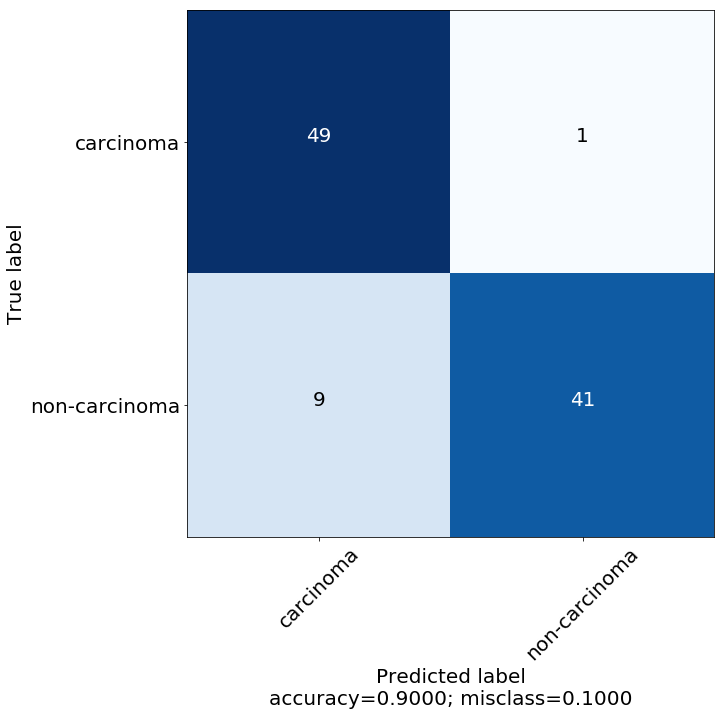

In [19]:
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 20})

labels = []

label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

for k,v in indexlabel.items():
    labels.append(v)

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.savefig('plots/3.InceptionV3-2-Private-DataSet-CM.png', bbox_inches='tight', dpi = 100) 


plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes=labels, title=' ')

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred=predictions
y_pred_probabilities=y_pred

# y_pred = np.argmax(y_pred,axis = 1) 
y_actual = y_true

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

confusion_mtx = confusion_matrix(y_actual, y_pred) 
print(confusion_mtx)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

[[49  1]
 [ 9 41]]
               precision    recall  f1-score   support

    carcinoma       0.84      0.98      0.91        50
non-carcinoma       0.98      0.82      0.89        50

    micro avg       0.90      0.90      0.90       100
    macro avg       0.91      0.90      0.90       100
 weighted avg       0.91      0.90      0.90       100



In [21]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  84.48275862068965
Specificity :  97.61904761904762


In [22]:
print('roc_auc_score = ' + str(roc_auc_score(predictions, y_true)))

roc_auc_score = 0.9105090311986865


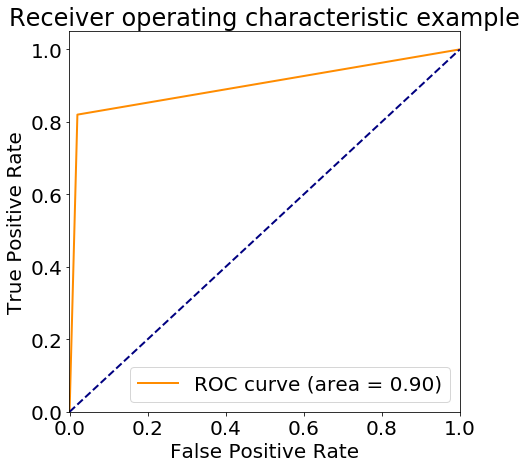

In [23]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(7,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-.001, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
predict = model.predict_proba(test_data, batch_size=batch_size, verbose=1)

100/100 [==============================] - 0s 60us/step


In [25]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y = label_binarize(test_labels, classes=[0, 1])
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [26]:
from scipy import interp
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

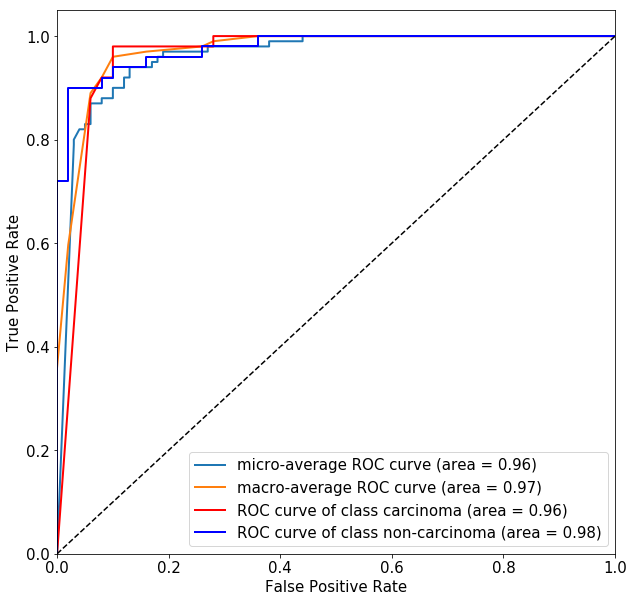

In [27]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from itertools import cycle
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
    

plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)
plot_name = 'no variation'
colors = cycle(['red','blue','green','yellow','orange', 'aqua', 'cornflowerblue'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classnames[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [28]:
tn, fp, fn, tp = cm.ravel()

In [29]:
print("Accuracy:",(tp+tn)/(tp+tn+fp+fn))
print("Precision:",(tp/(tp+fp)))
print("Recall:",(tp/(tp+fn)))
print("tp:", tp) 
print("fp:", fp) 
print("tn:",tn) 
print("fn:",fn)

Accuracy: 0.9
Precision: 0.9761904761904762
Recall: 0.82
tp: 41
fp: 1
tn: 49
fn: 9


In [30]:
print('F1 score:', f1_score(y_true, y_pred))

F1 score: 0.8913043478260869


In [31]:
recall = (tp/(tp+fn))
precision=(tp/(tp+fp))

f1 = 2 / ( (1/recall) + (1 / precision))
print('F1 score:', f1)

F1 score: 0.8913043478260869


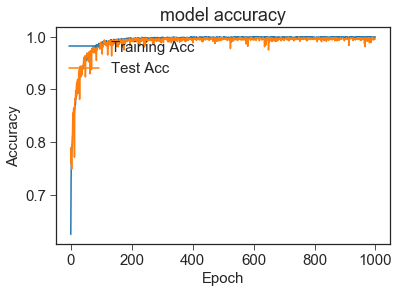

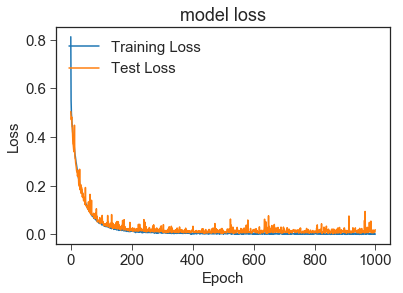

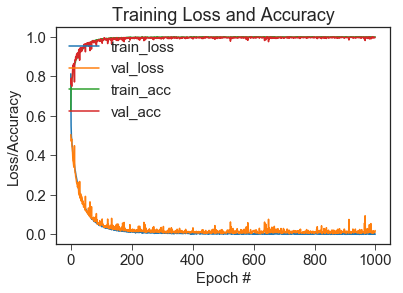

In [32]:
plt.style.use("seaborn-ticks")

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Test Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")